### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargar datos

In [4]:
Train = pd.read_excel('DataTrain.xlsx')
Vyg = pd.read_excel('Data_trainVyg.xlsx')
Test = pd.read_excel('DataTest.xlsx')

In [5]:
Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


In [6]:
Vyg

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
...,...,...,...
106,106,2019042101,7.425
107,107,2019042309,9.335
108,108,2019050700,9.240
109,109,2019052101,7.435


In [7]:
Test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


In [8]:
Train['Beaufort'].unique()

array(['medium', 'low', 'high'], dtype=object)

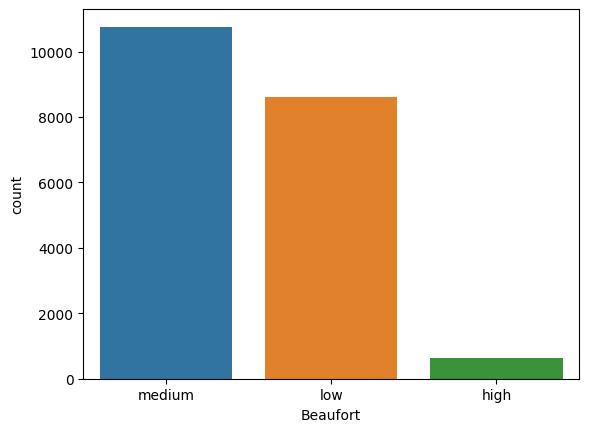

In [9]:
sns.countplot(data=Train,x="Beaufort")
plt.show()

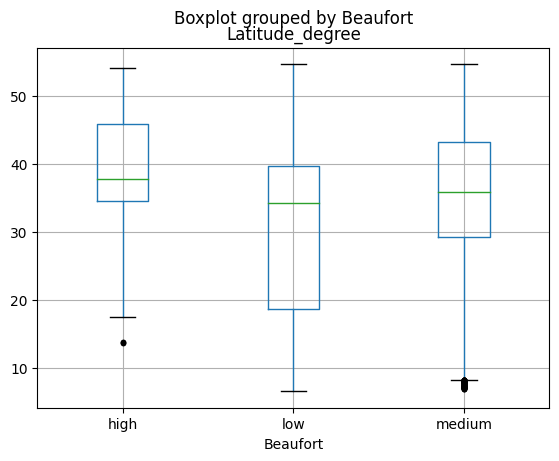

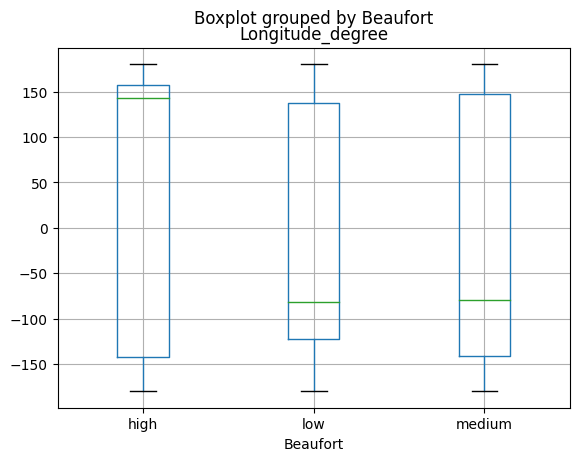

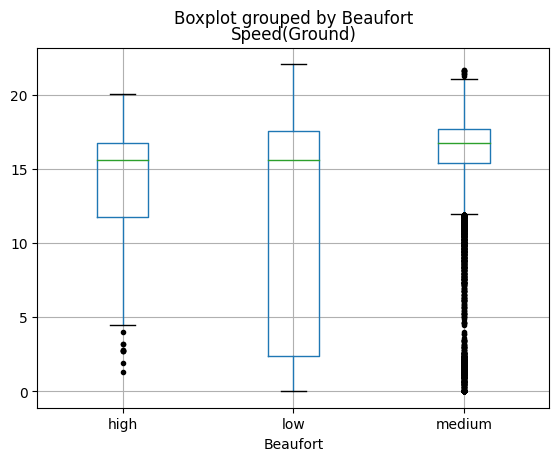

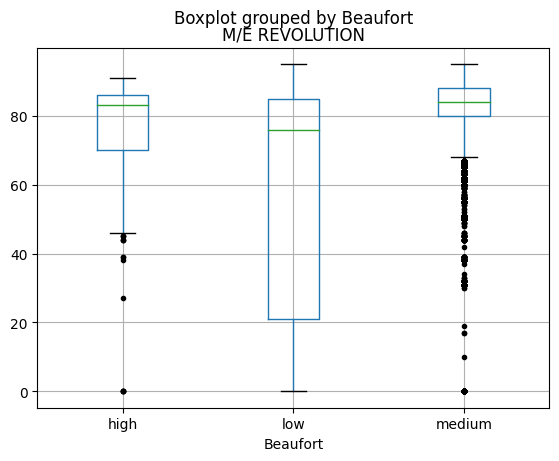

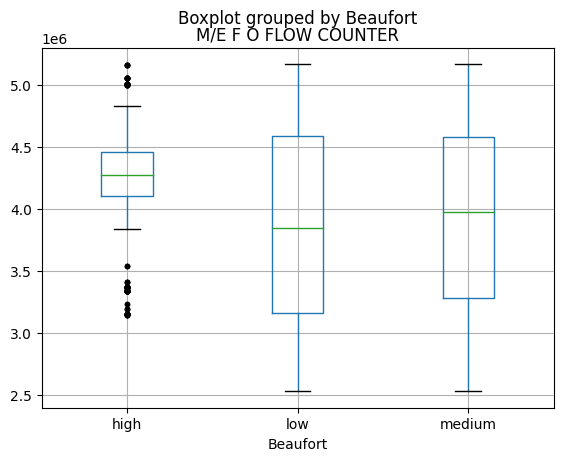

In [10]:
#Train.boxplot(column="Latitude_degree", by='Beaufort', sym = 'k.')
for col in Train.columns:
    try:
        float(Train['{}'.format(col)][0])
        Train.boxplot(column='{}'.format(col), by='Beaufort', sym = 'k.')

    except:
        continue

Para la columna 'M/E REVOLUTION' hay varios valores que parecen outliers, pero parecen corresponder con los valores de 'Speed', por lo que los datos son correctos y no hay que filtrarlos.

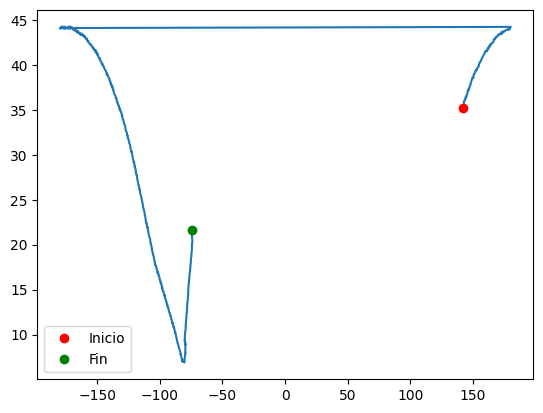

In [11]:
plt.plot(Train['Longitude_degree'].head(520),Train['Latitude_degree'].head(520))
plt.plot(Train['Longitude_degree'][0],Train['Latitude_degree'][0],'ro',label='Inicio')
plt.plot(Train['Longitude_degree'][520],Train['Latitude_degree'][520],'go',label='Fin')
plt.legend()
plt.show()

# Unir Df

In [12]:
Train['Date'] = pd.to_datetime(Train['Date']) # Pasar a formato fecha


In [13]:
# Corregir formato de fecha
Vyg['Date2'] = pd.to_datetime(Vyg['Date(UTC)'], format='%Y%m%d%H')
Vyg['Date2'] = Vyg['Date2'].dt.date
Vyg

,vyg,Date(UTC),DRAFT,Date2
0,0,2016060301,9.175,2016-06-03
1,1,2016062500,9.250,2016-06-25
2,2,2016062700,9.365,2016-06-27
3,3,2016062901,8.645,2016-06-29
4,4,2016070600,7.805,2016-07-06
...,...,...,...,...
106,106,2019042101,7.425,2019-04-21
107,107,2019042309,9.335,2019-04-23
108,108,2019050700,9.240,2019-05-07
109,109,2019052101,7.435,2019-05-21


In [14]:
Train['Date2'] = Train['Date'].dt.date
Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,Date2
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,2016-06-03
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,2016-06-03
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,2016-06-03
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,2016-06-03
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,2016-06-03
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,2018-11-27
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,2018-11-27
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,2018-11-27
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,2018-11-27


In [15]:
pd.merge(Train, Vyg, on='Date2', how='left')

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,Date2,vyg,Date(UTC),DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,2016-06-03,0.0,2.016060e+09,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,2016-06-03,0.0,2.016060e+09,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,2016-06-03,0.0,2.016060e+09,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,2016-06-03,0.0,2.016060e+09,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,2016-06-03,0.0,2.016060e+09,9.175
...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN


In [16]:
# Merge de los dos dataframes
Train = pd.merge(Train, Vyg, on='Date2', how='left')
Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,Date2,vyg,Date(UTC),DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,2016-06-03,0.0,2.016060e+09,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,2016-06-03,0.0,2.016060e+09,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,2016-06-03,0.0,2.016060e+09,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,2016-06-03,0.0,2.016060e+09,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,2016-06-03,0.0,2.016060e+09,9.175
...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,2018-11-27,NaN,NaN,NaN


In [17]:
# Borrar columnas
Train.drop(['Date2'], axis=1, inplace=True)
Train.drop(['vyg'], axis=1, inplace=True)
Train.drop(['Date(UTC)'], axis=1, inplace=True)
Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,9.175
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,NaN


In [18]:
# Rellenar valores None
Train.ffill(axis=0, inplace=True)
Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,9.175
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,7.610
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,7.610
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,7.610
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,7.610


### Añadir columna Diff

In [19]:
Train["Flow_Diff"] = Train['M/E F O FLOW COUNTER'].diff()

Train.bfill(axis=0, inplace=True) # El primer valor de Flow_Diff es NaN, por lo que se rellena con el valor siguiente

Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT,Flow_Diff
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175,169.0
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,9.175,163.0
...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,7.610,0.0


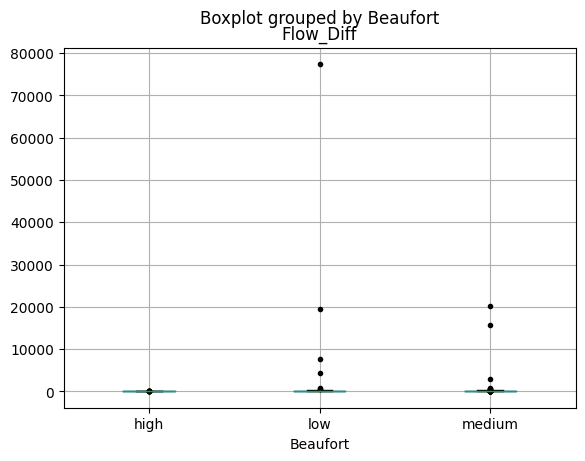

In [20]:
Train.boxplot(column='Flow_Diff', by='Beaufort', sym = 'k.')
plt.show()

### Filtrar outliers en la columna Diff

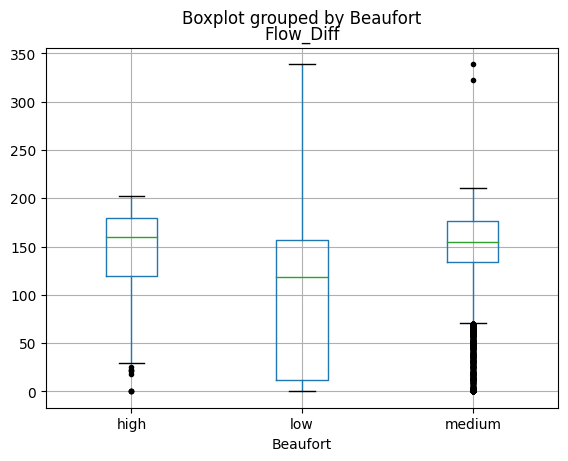

In [21]:
Train = Train[Train['Flow_Diff'] <= 350]
Train.boxplot(column='Flow_Diff', by='Beaufort', sym = 'k.')
plt.show()

### Añadir columna numerica para 'Beaufort'

In [22]:
Train['Beaufort'] = Train['Beaufort'].replace({'low':0, 'medium':1, 'high':2})
Train

<ipython-input-22-8330f9ad53bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Beaufort'] = Train['Beaufort'].replace({'low':0, 'medium':1, 'high':2})


,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT,Flow_Diff
0,2016-06-03 01:00:00,35.175000,141.595556,1,17.5,86,2531274,9.175,169.0
1,2016-06-03 02:00:00,35.315833,141.884444,1,18.3,86,2531443,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,1,18.4,86,2531608,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,1,18.1,86,2531771,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,1,18.8,86,2531934,9.175,163.0
...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,0,0.0,0,5165079,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,0,0.0,0,5165079,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,0,0.0,0,5165079,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,0,0.0,0,5165079,7.610,0.0


# Regresión Lineal

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [24]:
X = Train.drop(['Date','Flow_Diff','M/E F O FLOW COUNTER'], axis=1)
y = Train['Flow_Diff']

X

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,35.175000,141.595556,1,17.5,86,9.175
1,35.315833,141.884444,1,18.3,86,9.175
2,35.458333,142.121111,1,18.4,86,9.175
3,35.573611,142.548611,1,18.1,86,9.175
4,35.939722,142.768889,1,18.8,86,9.175
...,...,...,...,...,...,...
19995,34.751111,137.318333,0,0.0,0,7.610
19996,34.750556,137.317778,0,0.0,0,7.610
19997,34.750833,137.317500,0,0.0,0,7.610
19998,34.751111,137.317500,0,0.0,0,7.610


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
modelo_lin= LinearRegression()
modelo_lin.fit(X_train, y_train)
#modelo_lin.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
y_pred = modelo_lin.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))
print("factor r^2: {:.2f}".format(r2_score(y_test, y_pred)))

Error cuadrático medio: 570.81
factor r^2: 0.86


# Regresión polinomica    

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [30]:
for grados in range(1, 8):
    modelo_poly = make_pipeline(PolynomialFeatures(grados), LinearRegression())
    modelo_poly.fit(X_train, y_train)
    y_pred = modelo_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Grado: {} - Ecm: {:.2f} - r2: {:.2f}".format(grados, mse, r2_score(y_test, y_pred)))


Grado: 1 - Ecm: 570.81 - r2: 0.86
Grado: 2 - Ecm: 197.61 - r2: 0.95
Grado: 3 - Ecm: 192.29 - r2: 0.95
Grado: 4 - Ecm: 187.04 - r2: 0.95
Grado: 5 - Ecm: 186.17 - r2: 0.95
Grado: 6 - Ecm: 301.64 - r2: 0.92
Grado: 7 - Ecm: 1126.05 - r2: 0.72


Con un grado se obtiene el mismo valor que en caso de la regresión lineal, lo cual tiene sentido.

El mejor ajuste se obtiene para 5 grados. con un factor de $r^2 = 0.95$

# Support Vector Machine

### Lineal

In [31]:
from sklearn.svm import SVR

In [32]:
svm_lineal = SVR(kernel='linear')
svm_lineal.fit(X_train, y_train)
y_pred = svm_lineal.predict(X_test)

mse_lineal = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio: {:.2f}".format(mse_lineal))
print("factor r^2: {:.2f}".format(r2_score(y_test, y_pred)))

Error cuadrático medio: 619.99
factor r^2: 0.85


### Polinómico

In [33]:
for grado in range(2,7):
    svm_poly = SVR(kernel='poly', degree=grado)
    svm_poly.fit(X_train, y_train)

    y_pred = svm_poly.predict(X_test)
    mse_poly = mean_squared_error(y_test, y_pred)
    print("Grado: {} - Ecm: {:.2f} - r2: {:.2f}".format(grado, mse_poly, r2_score(y_test, y_pred)))

Grado: 2 - Ecm: 276.07 - r2: 0.93
Grado: 3 - Ecm: 347.48 - r2: 0.91
Grado: 4 - Ecm: 544.59 - r2: 0.86
Grado: 5 - Ecm: 744.19 - r2: 0.81
Grado: 6 - Ecm: 1076.83 - r2: 0.73


Se ve que para este caso, el mejor método es el de grado 2. Aumentar el grado solo disminuye la precision.

Sin embargo, la perdición de este modelo es menor al modelo de regresión polinómica del caso anterior.

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rforest = RandomForestRegressor(n_estimators=50, random_state=42)

rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print("Error cuadrático medio: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Factor r^2: {:.2f}".format(r2_score(y_test, y_pred)))



Error cuadrático medio: 161.81
Factor r^2: 0.96


Hasta ahora, este es el mejor resultado.

# Red Neuronal

In [36]:
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
keras.backend.clear_session()

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Capa de salida para regresión
])

#model.add()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

y_pred = model.predict(X_test)

print("Error cuadrático medio: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Factor r^2: {:.2f}".format(r2_score(y_test, y_pred)))

125/125 [==============================] - 0s 2ms/step
Error cuadrático medio: 291.36
Factor r^2: 0.93


# Calculo Final

In [38]:
Test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


Los datos de Test no tienen un valor de 'DRAFT', por lo que lo quitamos de los datos de entrenamiento

In [39]:
X_train

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
10678,20.105278,-107.956944,0,19.0,90,7.760
842,10.812778,-88.974167,1,20.9,85,7.805
10428,28.148889,-72.684444,0,18.4,90,8.665
15541,33.367222,135.456111,1,15.9,80,6.890
5166,10.696667,-113.243056,1,20.1,92,7.805
...,...,...,...,...,...,...
11297,54.269722,-163.178611,1,15.8,87,9.460
11977,40.251111,-175.244722,2,14.5,79,9.460
5396,24.028333,173.084167,1,17.5,85,7.805
861,13.498333,-94.518333,0,18.5,85,7.805


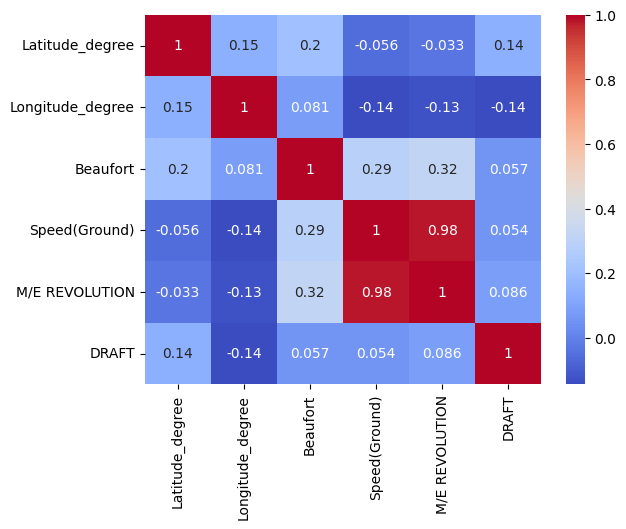

In [40]:
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

En este gráfico se ve como la variable 'DRAFR' tiene una baja correlación con todas las demás variables.

In [41]:
X_train =  X_train.drop(['DRAFT'],axis=1)
X_test =  X_test.drop(['DRAFT'],axis=1)

X_train

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
10678,20.105278,-107.956944,0,19.0,90
842,10.812778,-88.974167,1,20.9,85
10428,28.148889,-72.684444,0,18.4,90
15541,33.367222,135.456111,1,15.9,80
5166,10.696667,-113.243056,1,20.1,92
...,...,...,...,...,...
11297,54.269722,-163.178611,1,15.8,87
11977,40.251111,-175.244722,2,14.5,79
5396,24.028333,173.084167,1,17.5,85
861,13.498333,-94.518333,0,18.5,85


In [42]:
rforest = RandomForestRegressor(n_estimators=50, random_state=42)

rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print("Error cuadrático medio: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Factor r^2: {:.2f}".format(r2_score(y_test, y_pred)))



Error cuadrático medio: 182.11
Factor r^2: 0.95


Se ve que a pesar de quitar una característica, el modelo sigue teniendo una buena precisión.

In [43]:
Test_copia = Test.copy()
Test_copia = Test_copia.drop(['Date'], axis=1)
Test_copia['Beaufort'] = Test_copia['Beaufort'].replace({'low':0, 'medium':1, 'high':2})

In [44]:
Test_copia

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,34.750556,137.318056,0,0.0,0
1,34.751111,137.317222,0,0.0,0
2,34.750556,137.317500,0,0.0,0
3,34.751389,137.317500,0,0.0,0
4,34.750833,137.317500,0,0.0,0
...,...,...,...,...,...
4424,33.175278,-132.280278,1,17.9,92
4425,33.053056,-131.792500,1,17.8,91
4426,33.093333,-131.602500,1,17.5,91
4427,32.785000,-131.243333,1,17.5,92


In [45]:
y_fianl = rforest.predict(Test_copia)

Test['Flow_Diff'] = y_fianl

Test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,Flow_Diff
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,0.000000
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,0.121758
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,0.000000
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,0.000000
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,0.000000
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,194.280000
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,186.880000
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,182.480000
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,186.540000


<ipython-input-46-4b6c9e4797a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Test_corr.corr(), annot=True, cmap="coolwarm")


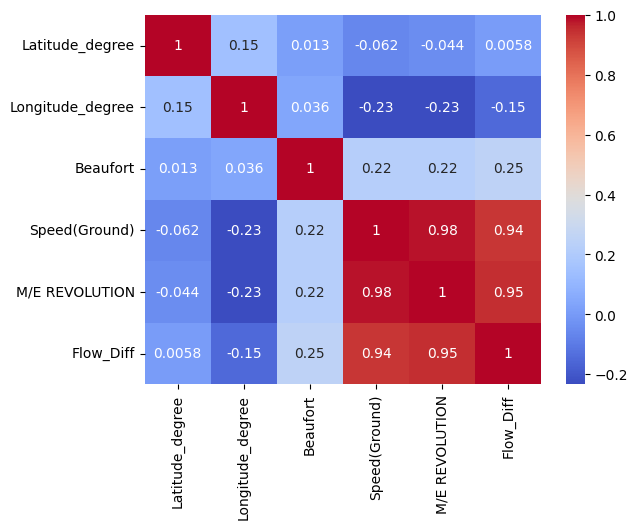

In [46]:
Test_corr = Test.copy()
Test_corr['Beaufort'] = Test_corr['Beaufort'].replace({'low':0, 'medium':1, 'high':2})
sns.heatmap(Test_corr.corr(), annot=True, cmap="coolwarm")
plt.show()
